# Build Waste Classifier Model

Dataset: 
- https://github.com/garythung/trashnet
- https://www.kaggle.com/datasets/mostafaabla/garbage-classification


## Load Images

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'enter path here'

/content/drive/MyDrive/Waste Classifier


In [ ]:
rootdir = 'enter path here'
datadir = os.path.join(rootdir, 'Dataset 2.0')

In [ ]:
import matplotlib.pyplot as plt

metal :  769
cardboard :  891
plastic :  865
Total Number of Images:  2525


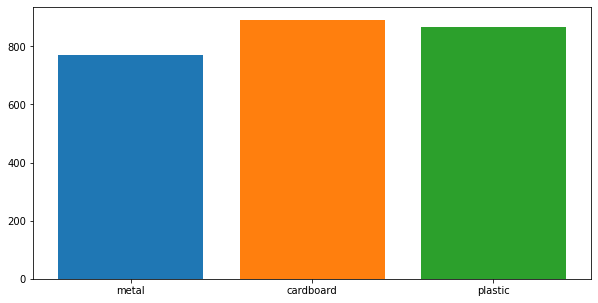

In [ ]:
class_names = []
class_amount = {}
total = 0

plt.figure(figsize=(10,5))
for folder in os.listdir(datadir):
  class_names.append(folder)
  no_of_imgs = len(os.listdir(os.path.join(datadir, folder)))
  class_amount[folder] = no_of_imgs
  plt.bar(folder, no_of_imgs)
  print(folder, ': ', no_of_imgs)
  total += no_of_imgs

print('Total Number of Images: ', total)
plt.show()

In [ ]:
import cv2
import numpy as np

In [ ]:
images = []
labels = []

for _class in class_names:
  class_path = os.path.join(datadir, _class)
  idx = class_names.index(_class)
  for _file in os.listdir(class_path):
    file_path = os.path.join(class_path, _file)
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    
    images.append(img)
    labels.append(idx)


## Image Visualization

In [ ]:
import random

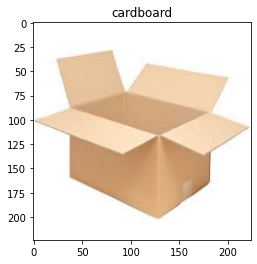

In [ ]:
idx = random.randint(0, len(images)-1)
img = images[idx]
label = class_names[labels[idx]]
plt.imshow(img)
plt.title(label)
plt.show()

## Image Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
images = np.array(images)/255
labels = np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2020, 224, 224, 3)
(505, 224, 224, 3)
(2020,)
(505,)


In [ ]:
del images, labels

## Model Architecture

In [ ]:
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model_input = (224, 224, 3)
num_classes = len(class_names)

In [ ]:
conv_layers = MobileNet(include_top=False, weights='imagenet', input_shape=model_input)

17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
len(conv_layers.layers)

86

In [ ]:
model.add(conv_layers)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 28,921,027
Trainable params: 28,899,139
Non-trainable params: 21,888
_______________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
epochs = 30
batch_size = 32

# Apply Image Augmentation or Transformations
train_datagen = ImageDataGenerator(
      rescale=1./255, # enlargement
      rotation_range=20, # rotation
      width_shift_range=0.2, # translation
      height_shift_range=0.2, # translation
      horizontal_flip=True, # reflection
      fill_mode='nearest')

In [ ]:
data_iterator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

In [ ]:
mc = ModelCheckpoint('MobileNet_model.h5', monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

In [ ]:
history = model.fit(data_iterator,
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    callbacks=[mc])

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 5.7935 - accuracy: 0.7279
Epoch 1: val_accuracy improved from -inf to 0.61980, saving model to MobileNet_model.h5
63/63 [==============================] - 43s 518ms/step - loss: 5.7935 - accuracy: 0.7279 - val_loss: 7.5361 - val_accuracy: 0.6198
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.3372 - accuracy: 0.8687
Epoch 2: val_accuracy improved from 0.61980 to 0.76634, saving model to MobileNet_model.h5
63/63 [==============================] - 32s 506ms/step - loss: 0.3372 - accuracy: 0.8687 - val_loss: 2.0077 - val_accuracy: 0.7663
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.2487 - accuracy: 0.9180
Epoch 3: val_accuracy did not improve from 0.76634
63/63 [==============================] - 28s 441ms/step - loss: 0.2487 - accuracy: 0.9180 - val_loss: 1.3878 - val_accuracy: 0.7287
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.2633 - accuracy: 0.906

KeyboardInterrupt: ignored

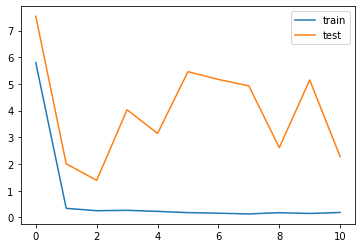

In [ ]:
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()
plt.savefig("MobileNet Loss Graph")
plt.show()

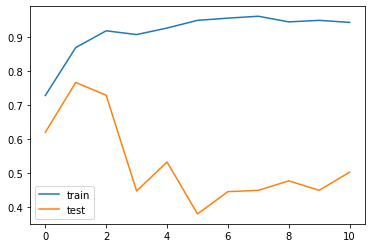

In [ ]:
plt.plot(model.history.history['accuracy'], label='train')
plt.plot(model.history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig("MobileNet Accuracy Graph")
plt.show()

## Data Evaluation

In [ ]:
from keras.models import load_model

In [ ]:
h5model = load_model('MobileNet_model.h5')

In [ ]:
loss, accuracy = h5model.evaluate(x_train, y_train, verbose=0)
print('Training Loss: ', round(loss, 2))
print('Training Accuracy: ', round(accuracy*100, 2), '%')

Training Loss:  1.25
Training Accuracy:  78.96 %


In [ ]:
loss, accuracy = h5model.evaluate(x_test, y_test, verbose=0)
print('Testing Loss: ', round(loss, 2))
print('Testing Accuracy: ', round(accuracy*100, 2), '%')

Testing Loss:  2.01
Testing Accuracy:  76.63 %


In [ ]:
y_preds = h5model.predict(x_test, verbose=0)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, np.argmax(y_preds, axis=1), target_names=class_names))

              precision    recall  f1-score   support

       metal       0.81      0.82      0.81       154
   cardboard       0.98      0.61      0.75       178
     plastic       0.64      0.88      0.74       173

    accuracy                           0.77       505
   macro avg       0.81      0.77      0.77       505
weighted avg       0.81      0.77      0.77       505



CORRECT!


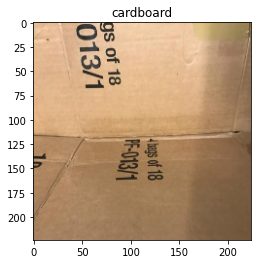

In [ ]:
idx = random.randint(0, len(x_test)-1)
y_pred = y_preds[idx]
y_pred = np.argmax(y_pred, axis=0)
y_true = y_test[idx]

plt.imshow(x_test[idx])

if y_pred == y_true:
  print('CORRECT!')
  plt.title(class_names[y_true])
else:
  print('MISCLASSIFICATION!')
  print('PREDICTED LABEL: ', class_names[y_pred])
  print('CORRECT LABEL: ', class_names[y_true])

plt.show()

In [ ]:
print(class_names)

['metal', 'cardboard', 'plastic']
